In [0]:
!unzip '/content/covid19-corona-virus-india-dataset (3).zip'

Archive:  /content/covid19-corona-virus-india-dataset (3).zip
  inflating: api.ipynb               
  inflating: complete.csv            
  inflating: district_level_latest.csv  
  inflating: nation_level_daily.csv  
  inflating: patients_data.csv       
  inflating: state_level_latest.csv  
  inflating: tests_daily.csv         
  inflating: tests_latest_state_level.csv  
  inflating: web_scraping.ipynb      
  inflating: zones.csv               


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
sns.set_style('darkgrid')
from scipy.optimize import curve_fit ;

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/content/datasets_549966_1231134_complete.csv')
#pat = pd.read_csv('/content/patients_data.csv')
#dis = pd.read_csv('/content/district_level_latest.csv')
#state = pd.read_csv('/content/state_level_latest.csv')
nat = pd.read_csv('/content/datasets_549966_1231134_nation_level_daily.csv')

In [8]:
df.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0


In [0]:
sta = df.groupby(by=['Name of State / UT'])

In [0]:
delhi = sta.get_group('Delhi')

In [6]:
delhi.dtypes

Date                          object
Name of State / UT            object
Latitude                     float64
Longitude                    float64
Total Confirmed cases          int64
Death                          int64
Cured/Discharged/Migrated      int64
dtype: object

In [7]:
delhi['chanege'] = delhi['Total Confirmed cases'].pct_change()*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
delhi['active'] = delhi['Total Confirmed cases']-delhi['Cured/Discharged/Migrated'];

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
delhi['New Cases'] = [0]+grow 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:
delhi['rM'] = delhi['New Cases'].rolling(window=7,center=False).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [95]:
print(delhi.shape)
delhi.tail()

(101, 11)


,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,chanege,active,New Cases,rM
2678,2020-06-06,Delhi,28.7041,77.1025,26334,708,10315,5.319149,16019,1330,1278.285714
2713,2020-06-07,Delhi,28.7041,77.1025,27654,761,10664,5.012531,16990,1320,1300.714286
2748,2020-06-08,Delhi,28.7041,77.1025,28936,812,10999,4.635857,17937,1282,1298.857143
2783,2020-06-09,Delhi,28.7041,77.1025,29943,874,11357,3.480094,18586,1007,1301.285714
2818,2020-06-10,Delhi,28.7041,77.1025,31309,905,11861,4.562001,19448,1366,1311.000000


In [12]:
active_del = delhi.active.tolist();len(active_del)

101

In [13]:
cases = delhi['Total Confirmed cases'].values;cases

array([    1,     1,     1,     2,     3,     3,     3,     4,     4,
           5,     6,     6,     7,     7,     7,     8,    10,    12,
          17,    26,    29,    29,    30,    31,    36,    36,    39,
          39,    53,    97,   152,   152,   219,   386,   445,   503,
         523,   576,   669,   720,   903,  1069,  1154,  1510,  1561,
        1578,  1640,  1707,  1893,  2003,  2081,  2156,  2248,  2376,
        2514,  2625,  2918,  3108,  3314,  3439,  3515,  3738,  4122,
        4549,  4898,  5104,  5532,  5980,  6318,  6542,  6923,  7233,
        7639,  7998,  8470,  8895,  9333, 10054, 10054, 10554, 11088,
       11659, 12319, 12910, 13418, 14053, 14465, 15257, 16281, 17386,
       18549, 19844, 20834, 22132, 23645, 25004, 26334, 27654, 28936,
       29943, 31309])

In [15]:
len(delhi.Date.values)

101

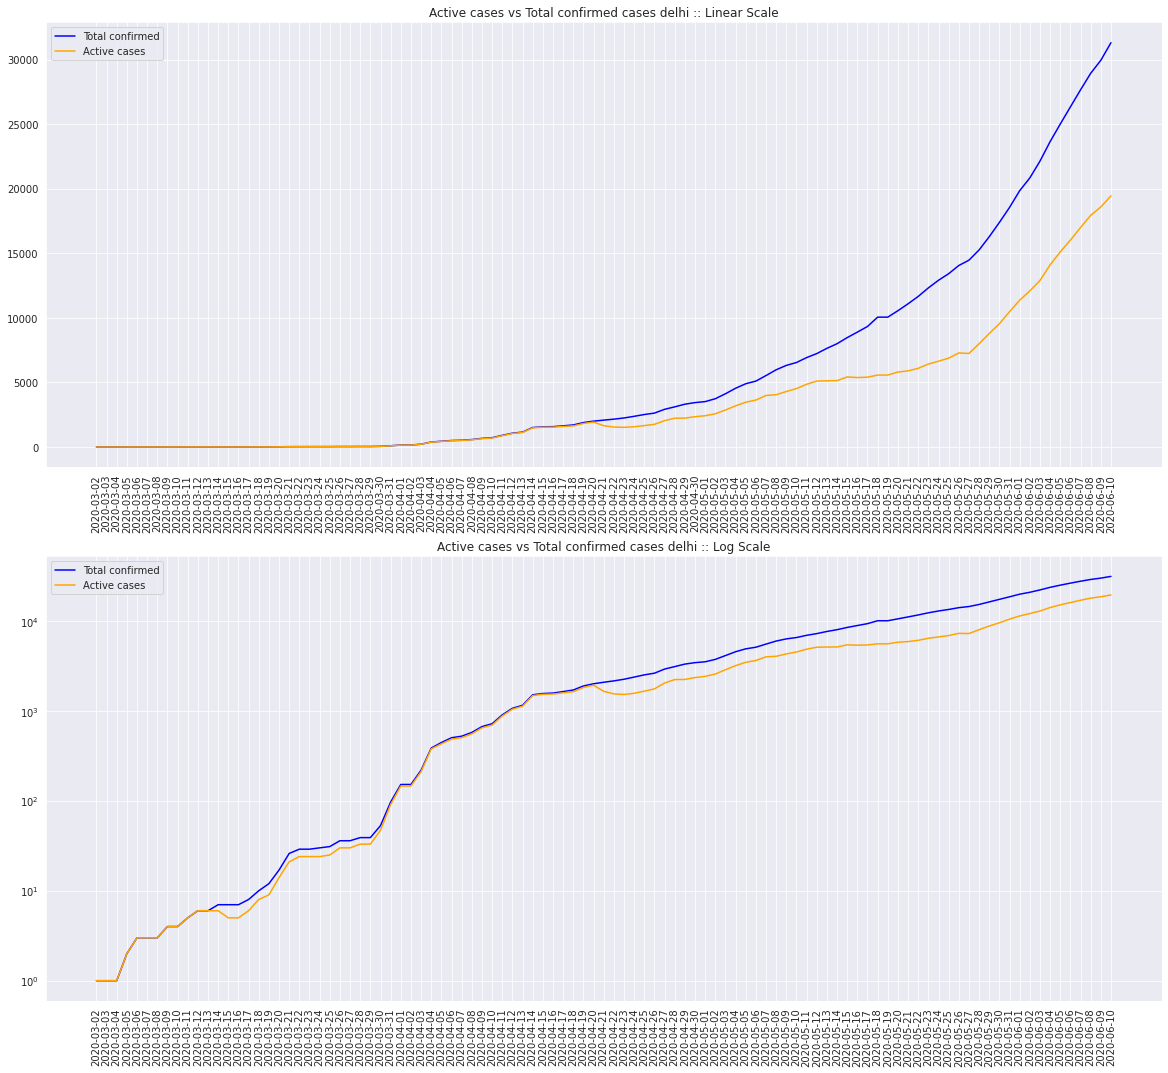

In [113]:
plt.figure(1,figsize=(20,18))
plt.subplot(211)
sns.lineplot(x=np.arange(101),y=cases,color='blue',label='Total confirmed',)
sns.lineplot(x=np.arange(101),y=active_del,color='orange',label='Active cases')
plt.xticks(np.arange(101),delhi.Date.values.tolist(),rotation=90);
##plt.yscale("log")
plt.title('Active cases vs Total confirmed cases delhi :: Linear Scale');
plt.subplot(212)
sns.lineplot(x=np.arange(101),y=cases,color='blue',label='Total confirmed',)
sns.lineplot(x=np.arange(101),y=active_del,color='orange',label='Active cases')
plt.xticks(np.arange(101),delhi.Date.values.tolist(),rotation=90);
plt.yscale("log")
plt.title('Active cases vs Total confirmed cases delhi :: Log Scale');

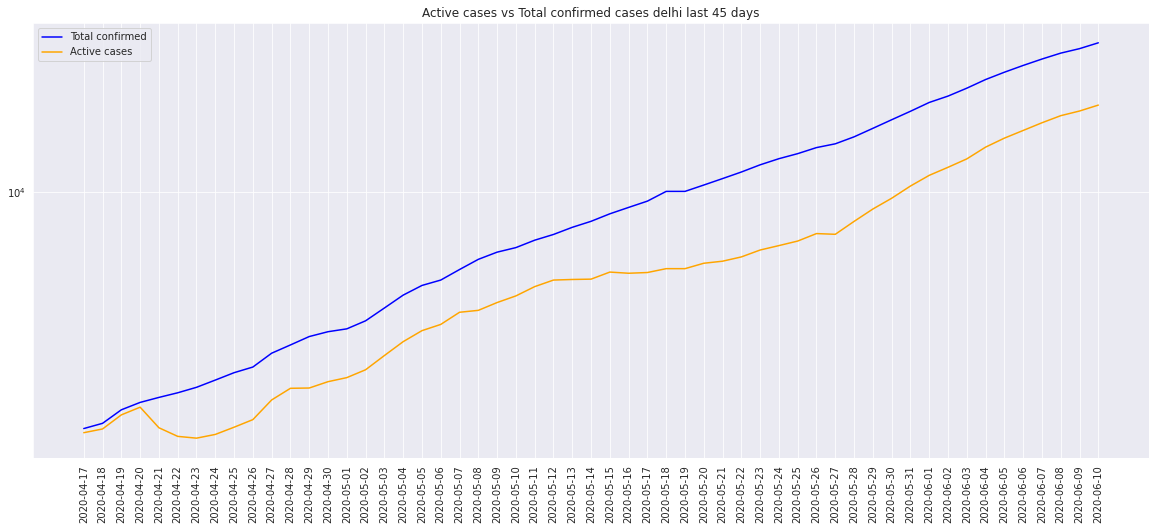

In [70]:
plt.figure(1,figsize=(22,20))
sns.lineplot(x=np.arange(101)[-55:],y=cases[-55:],color='blue',label='Total confirmed')
sns.lineplot(x=np.arange(101)[-55:],y=active_del[-55:],color='orange',label='Active cases')
plt.xticks(np.arange(101)[-55:],delhi.Date.values.tolist()[-55:],rotation=90);
plt.yscale("log")
plt.title('Active cases vs Total confirmed cases delhi last 45 days');

In [0]:
grow = []
val = [0]+cases
for i in range(len(val)-1):
  a = abs(val[i+1]-val[i])
  grow.append(a)
  


In [0]:
delhi_st = pd.read_csv('/content/state_wise_daily.csv')

In [0]:
delhi

### For delhi

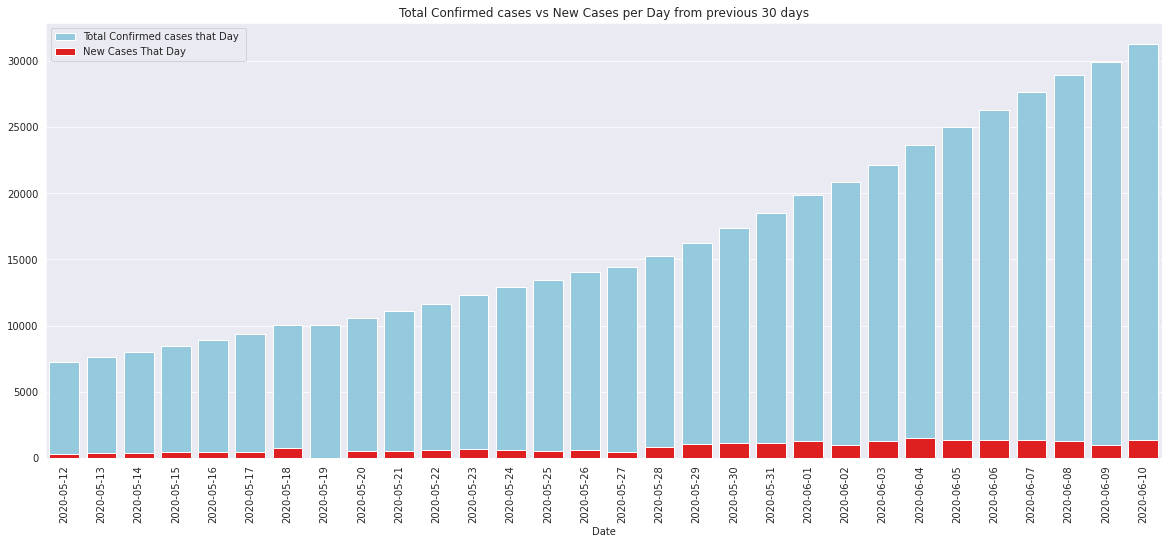

In [20]:
plt.figure(1,figsize=(20,8))
sns.barplot(x=delhi.Date[-30:],y=cases[-30:],color='skyblue',label='Total Confirmed cases that Day ');
sns.barplot(x=delhi.Date[-30:],y=grow[-30:],color='red',label='New Cases That Day');
plt.title("Total Confirmed cases vs New Cases per Day from previous 30 days")
plt.xticks(np.arange(30),delhi.Date.values.tolist()[-30:],rotation=90);
plt.legend()

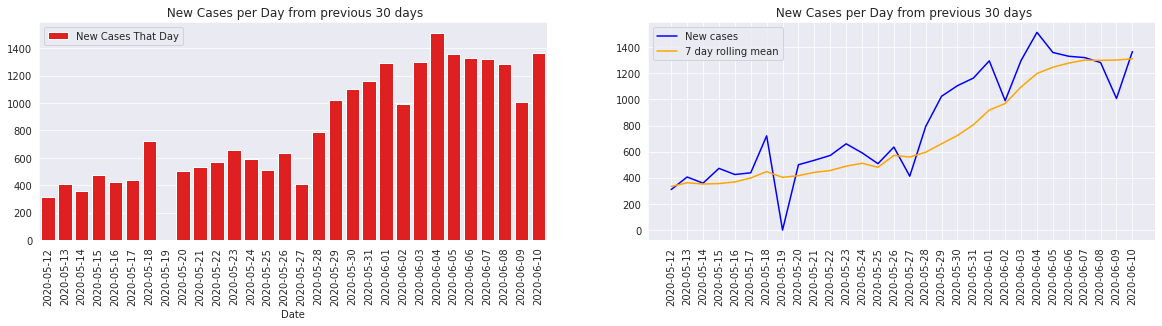

In [106]:
plt.figure(1,figsize=(20,4))
plt.subplot(121)
sns.barplot(x=delhi.Date[-30:],y=grow[-30:],color='red',label='New Cases That Day');
plt.title(" New Cases per Day from previous 30 days")
#plt.plot(grow[-30:])
plt.xticks(np.arange(30),delhi.Date.values.tolist()[-30:],rotation=90);
plt.legend()
plt.subplot(122)
#sns.barplot(x=delhi.Date[-30:],y=grow[-30:],color='red',label='New Cases That Day');
plt.title(" New Cases per Day from previous 30 days")
plt.plot(grow[-30:],color='Blue',label='New cases')
plt.plot(delhi['rM'][-30:].values,color='orange',label='7 day rolling mean')
plt.xticks(np.arange(30),delhi.Date.values.tolist()[-30:],rotation=90);
plt.legend()

In [22]:
delhi.Date.values

array(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
       '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
       '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
       '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
       '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
       '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18',
       '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22',
       '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26',
       '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
       '2020-05-01', '2020-05-02', '2020-05-03', '2020-

In [23]:
cases

array([    1,     1,     1,     2,     3,     3,     3,     4,     4,
           5,     6,     6,     7,     7,     7,     8,    10,    12,
          17,    26,    29,    29,    30,    31,    36,    36,    39,
          39,    53,    97,   152,   152,   219,   386,   445,   503,
         523,   576,   669,   720,   903,  1069,  1154,  1510,  1561,
        1578,  1640,  1707,  1893,  2003,  2081,  2156,  2248,  2376,
        2514,  2625,  2918,  3108,  3314,  3439,  3515,  3738,  4122,
        4549,  4898,  5104,  5532,  5980,  6318,  6542,  6923,  7233,
        7639,  7998,  8470,  8895,  9333, 10054, 10054, 10554, 11088,
       11659, 12319, 12910, 13418, 14053, 14465, 15257, 16281, 17386,
       18549, 19844, 20834, 22132, 23645, 25004, 26334, 27654, 28936,
       29943, 31309])

# Lets fits number of cases to  logistic curve

* A logistic function or logistic curve is a common S-shaped curve (sigmoid curve) with equation

![kd](https://wikimedia.org/api/rest_v1/media/math/render/svg/9e26947596d387d045be3baeb72c11270a065665)

> where

* e = the natural logarithm base (also known as Euler's number),
* x0 = the x value of the sigmoid's midpoint,
* L = the curve's maximum value,
* k = the logistic growth rate or steepness of the curve.[1]


<center><img src ='https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png'></center>

In [0]:
from scipy.optimize import curve_fit 

In [25]:
x = np.arange(1,102)
y = cases;len(cases)

101

In [0]:
def test(x,a,b,c):
  return a/(1+b*np.exp(c*(-x)))

In [27]:
par, par_cov = curve_fit(test, x, cases)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

overflow encountered in exp



In [28]:
par,par_cov

(array([2.24751012e+05, 2.00902827e+03, 5.73683477e-02]),
 array([[ 3.98964571e+09,  2.62135126e+07, -7.19807380e+01],
        [ 2.62135126e+07,  1.78144426e+05, -4.41130853e-01],
        [-7.19807380e+01, -4.41130853e-01,  1.47169413e-06]]))

In [0]:
x2 = np.arange(1,135)

In [0]:
ans = par[0]/(1+par[1]*np.exp(par[2]*(-x)))
ans2 = par[0]/(1+par[1]*np.exp(par[2]*(-x2))) # 

### Projecting next 25 days for delhi

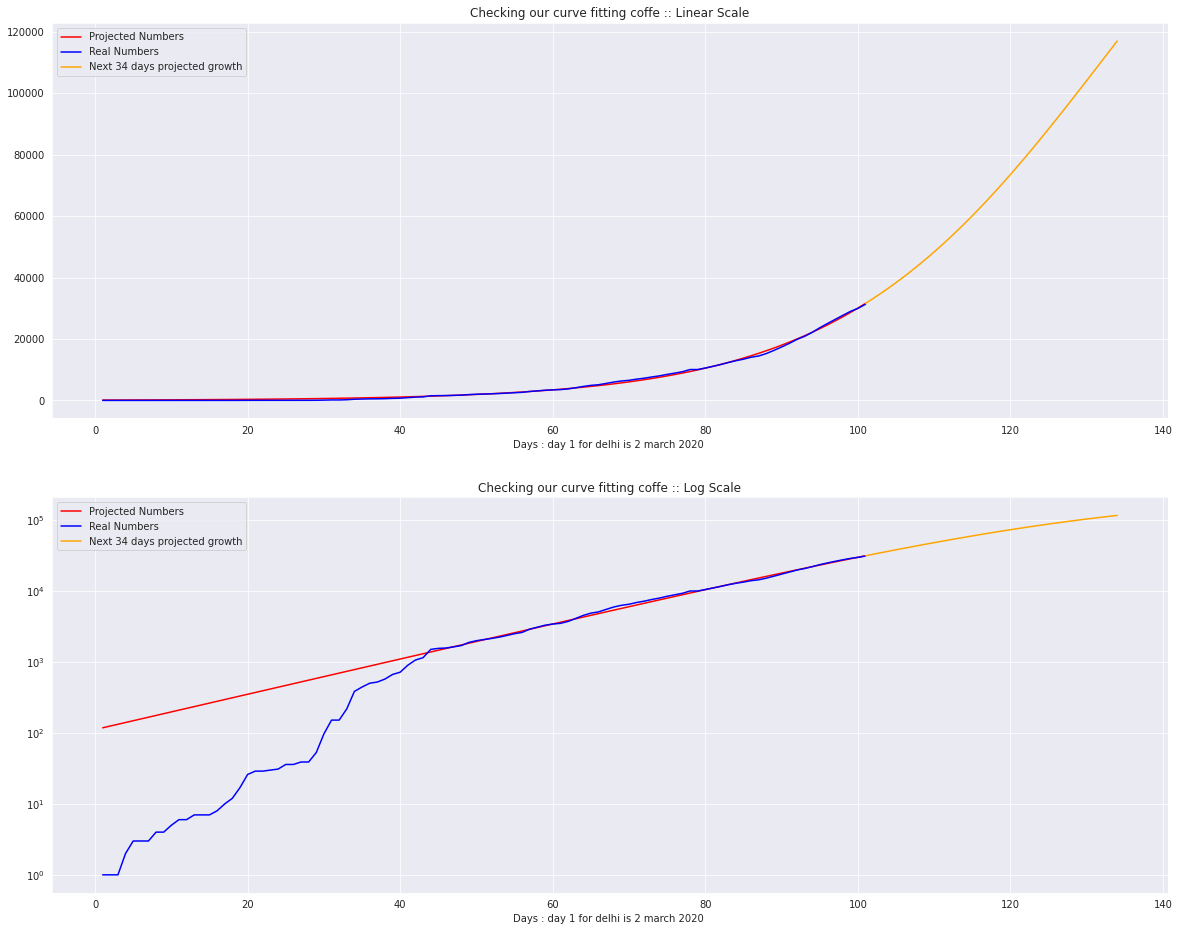

In [110]:
plt.figure(1,figsize=(20,16))
plt.subplot(211)
sns.lineplot(x=x,y=ans,color='red',label='Projected Numbers')
sns.lineplot(x=x,y=cases,color='blue',label='Real Numbers')
sns.lineplot(x=np.arange(1,135)[-34:],y=ans2[-34:],color='orange',label='Next 34 days projected growth')
plt.title('Checking our curve fitting coffe :: Linear Scale')
plt.xlabel('Days : day 1 for delhi is 2 march 2020 ')
#plt.yscale('log')
plt.legend()
plt.subplot(212)
sns.lineplot(x=x,y=ans,color='red',label='Projected Numbers')
sns.lineplot(x=x,y=cases,color='blue',label='Real Numbers')
sns.lineplot(x=np.arange(1,135)[-34:],y=ans2[-34:],color='orange',label='Next 34 days projected growth')
plt.title('Checking our curve fitting coffe :: Log Scale')
plt.xlabel('Days : day 1 for delhi is 2 march 2020 ')
plt.yscale('log')
plt.legend()

In [85]:
ans2[-45:]

array([ 17981.60099133,  18953.80063873,  19973.48607627,  21042.4199393 ,
        22162.36932352,  23335.09811126,  24562.35847094,  25845.88150736,
        27187.36704848,  28588.47256387,  30050.80122151,  31575.88910259,
        33165.19160856,  34820.06911146,  36541.77191635,  38331.42462436,
        40190.01000558,  42118.3525126 ,  44117.10158803,  46186.71494117,
        48327.4419912 ,  50539.30769449,  52822.09699275,  55175.34013456,
        57598.29913569,  60089.95565196,  62649.00054188,  65273.82539371,
        67962.51628307,  70712.85001122,  73522.29305133,  76388.00339965,
        79306.8354911 ,  82275.34829437,  85289.81665125,  88346.24586946,
        91440.38951886,  94567.7703191 ,  97723.7039446 , 100903.32551114,
       104101.61845067, 107313.44542706, 110533.58089947, 113756.7449015 ,
       116977.63757567])

In [0]:
cases[-5:]

array([6923, 7233, 7639, 7998, 8470])

In [38]:
nattot = nat.totalconfirmed.tolist();print(len(nattot))

132


In [39]:
nattot= np.array(nattot);len(nattot)

132

In [0]:
n1 = np.arange(1,133)

In [58]:
p,p_coc = curve_fit(test,n1[80:130],nattot[80:130])   # Fitting the national data

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



In [0]:
ansN = p[0]/(1+p[1]*np.exp(p[2]*(-n1)))

In [0]:
n2 = np.arange(133,163)
ansN2 = p[0]/(1+p[1]*np.exp(p[2]*(-n2)))

In [61]:
ansN2

array([99731.52, 99731.52, 99731.52, 99731.52, 99731.52, 99731.52,
       99731.52, 99731.52, 99731.52, 99731.52, 99731.52, 99731.52,
       99731.52, 99731.52, 99731.52, 99731.52, 99731.52, 99731.52,
       99731.52, 99731.52, 99731.52, 99731.52, 99731.52, 99731.52,
       99731.52, 99731.52, 99731.52, 99731.52, 99731.52, 99731.52])

In [0]:
nat['active'] = nat['totalconfirmed']-nat['totalrecovered']

In [73]:
nat.tail()

,date,totalconfirmed,totaldeceased,totalrecovered,dailyconfirmed,dailydeceased,dailyrecovered,active
127,05 June,236195,6648,113224,9472,286,4770,122971
128,06 June,246603,6945,118657,10408,297,5433,127946
129,07 June,257485,7206,123848,10882,261,5191,133637
130,08 June,265929,7477,129037,8444,271,5189,136892
131,09 June,274781,7718,134166,8852,241,5129,140615


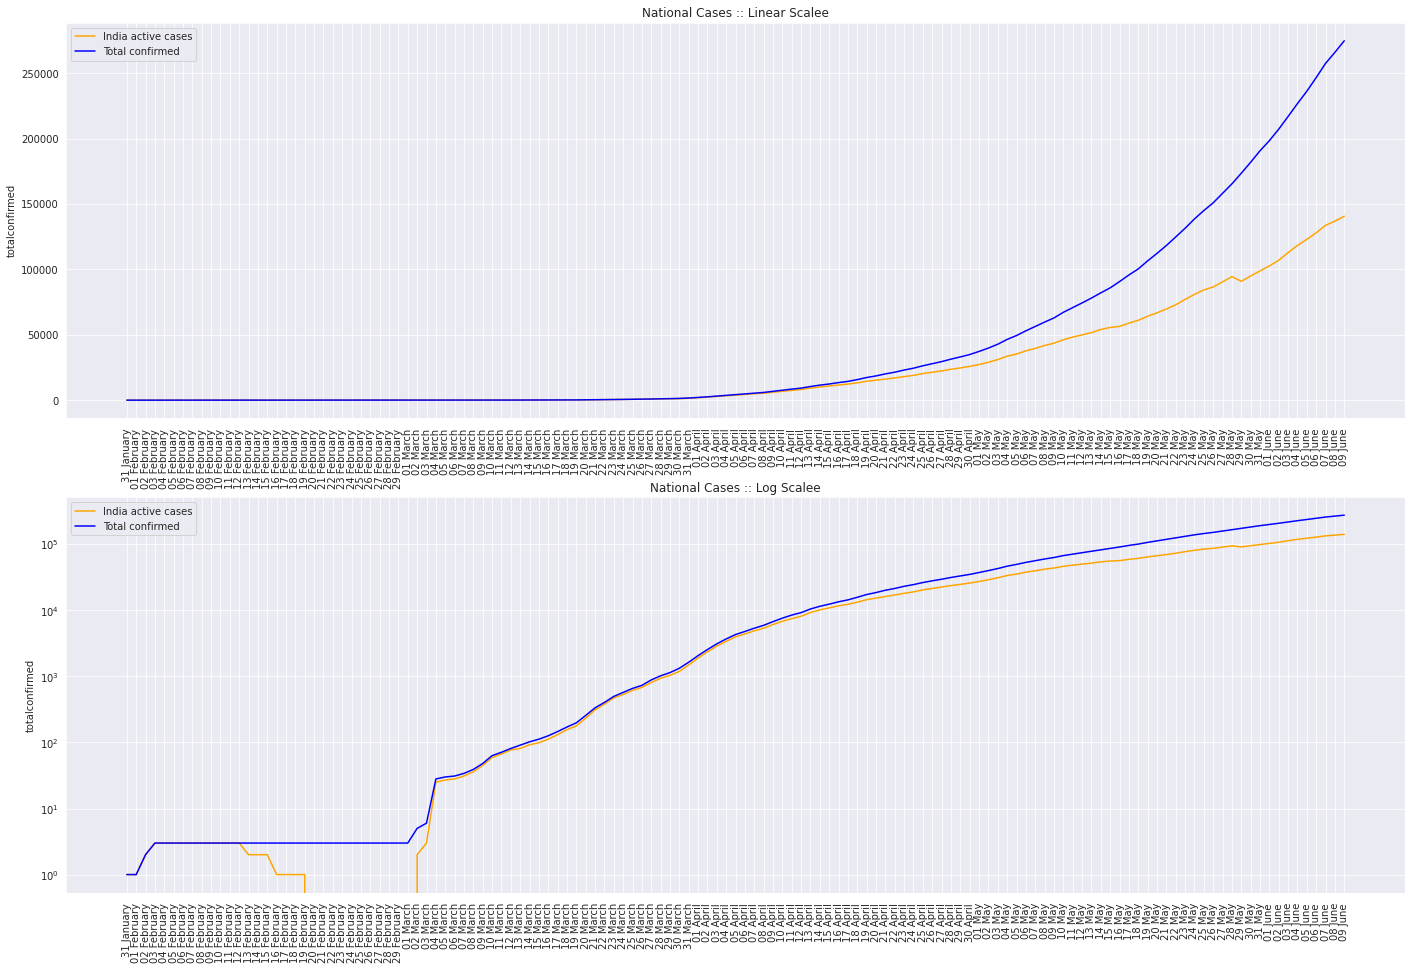

In [117]:
n = 1
plt.figure(1,figsize=(24,16))
plt.subplot(211)
sns.lineplot(x=np.arange(132)[n:],y=nat.active[n:],color='orange',label='India active cases')
sns.lineplot(x=np.arange(132)[n:],y=nat.totalconfirmed[n:],color='blue',label='Total confirmed')
plt.xticks(np.arange(132)[n:],nat.date.values.tolist()[n:],rotation=90);
plt.title("National Cases :: Linear Scalee")
#plt.yscale('log')
plt.subplot(212)
sns.lineplot(x=np.arange(132)[n:],y=nat.active[n:],color='orange',label='India active cases')
sns.lineplot(x=np.arange(132)[n:],y=nat.totalconfirmed[n:],color='blue',label='Total confirmed')
plt.xticks(np.arange(132)[n:],nat.date.values.tolist()[n:],rotation=90);
plt.title("National Cases :: Log Scalee")
plt.yscale('log')

### Projecting next 30 days for india

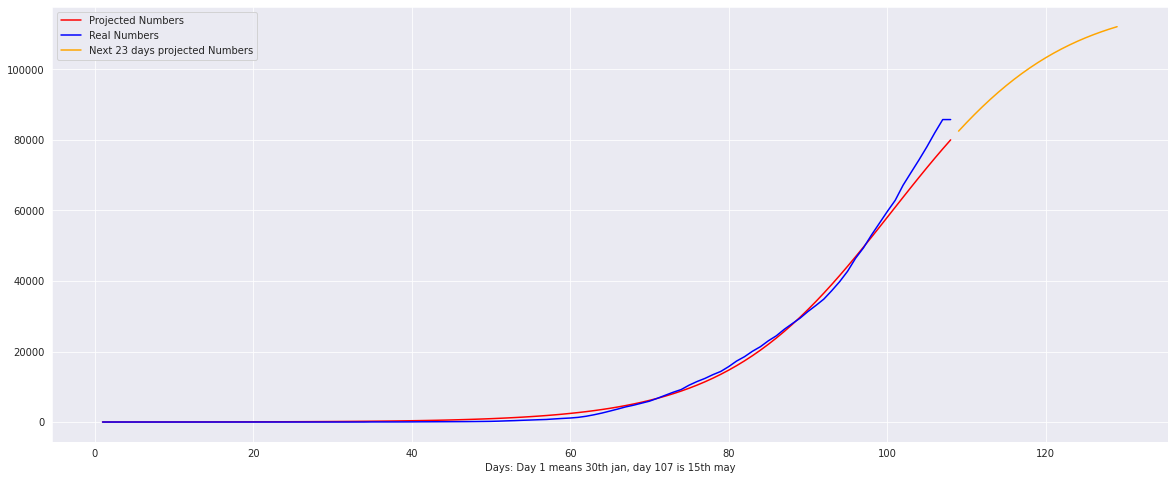

In [0]:
plt.figure(1,figsize=(20,8))
sns.lineplot(x=n1,y=ansN,color='red',label='Projected Numbers')
sns.lineplot(x=n1,y=nattot,color='blue',label='Real Numbers');
sns.lineplot(x=n2,y=ansN2,color='orange',label='Next 23 days projected Numbers');
plt.xlabel('Days: Day 1 means 30th jan, day 107 is 15th may');

In [0]:
ansN2

array([ 82512.32615605,  84906.45484192,  87206.89093214,  89409.221399  ,
        91510.25084238,  93507.9452267 ,  95401.35473727,  97190.52083093,
        98876.37246647, 100460.61616759, 101945.6240619 , 103334.32341911,
       104630.09054114, 105836.65118464, 106957.98906219, 107998.26339763,
       108961.73601998, 109852.70807596, 110675.46612254, 111434.23712344,
       112133.15170779])

In [0]:
n3 = np.arange(1,139)
ansN3 = p[0]/(1+p[1]*np.exp(p[2]*(-n3)))

In [0]:
dates = []
for i in range(17,32):
  s = str(i) + ' ' + 'May'
  dates.append(s)
for i in range(1,16):
  s = str(i) + ' ' + 'June'
  dates.append(s)

In [0]:
pred = [round(x) for x in ansN3]

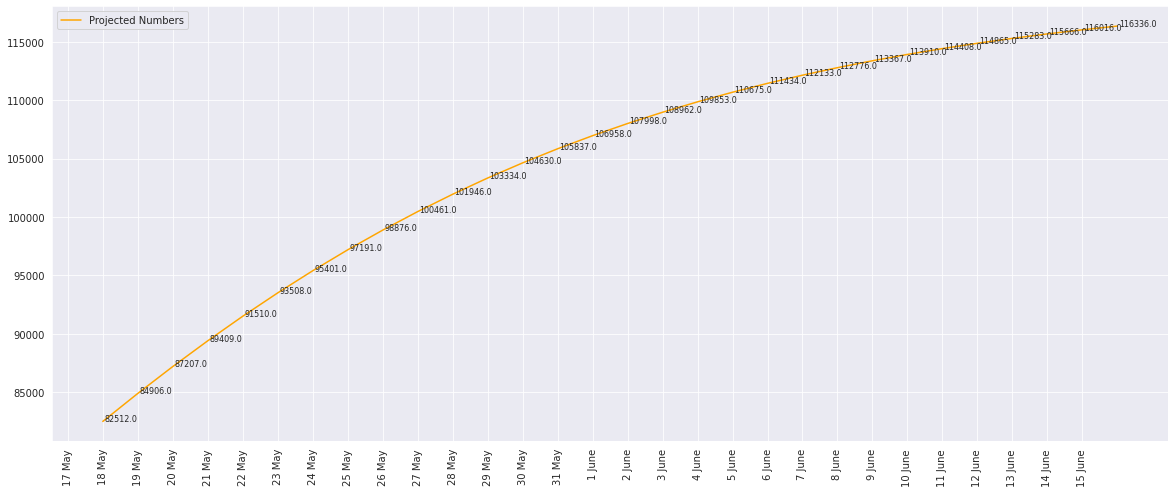

In [0]:
plt.figure(1,figsize=(20,8))
sns.lineplot(x=n3[-30:],y=pred[-30:],color='orange',label='Projected Numbers')
plt.xticks(np.arange(len(n3))[-30:],dates,rotation=90);
list1 = n3[-30:]
score = pred[-30:]
for i in range(len(list1)):
  plt.text(x =list1[i]+0.05 , y =score[i]+0.05, s =round(score[i],3), size = 8)
